In [1]:
from DQL import *
#env = gym.make('LunarLander-v2')

Using TensorFlow backend.


In [2]:
env = gym.make('LunarLander-v2')
dS = env.observation_space.shape[0]
nA = env.action_space.n


seed = 123
env.seed(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ['PYTHONHASHSEED']=str(seed)

params = {
    'batch_size' : 32,
    'gamma': 0.99,
    'tau': 0.001,
    'epsilon': 1,
    'epsilon_decay': 0.995,
    'lr': 0.005,
}

agent = DQL_agent(dS, nA, 
                  batch_size = params['batch_size'], 
                  gamma = params['gamma'], 
                  tau = params['tau'],
                  epsilon = params['epsilon'], 
                  epsilon_decay = params['epsilon_decay'],
                  lr = params['lr'],
                  dumpfile = "weights/final_model2"
                )

In [3]:
#episode 100, reward -144.74330487405993
agent.Q_learning(env)

episode 0, reward -139.61224244352002
episode 100, reward -137.60712663917747
episode 200, reward -79.513288451472125
episode 300, reward 38.87959638532933683
episode 400, reward 159.77245417223256
episode 500, reward 187.88565408360407
episode 600, reward 239.78626377429046
episode 700, reward 228.71260775397997
episode 800, reward 199.45255388172788
episode 900, reward 250.44475329174952
episode 999, reward 219.56783724212514

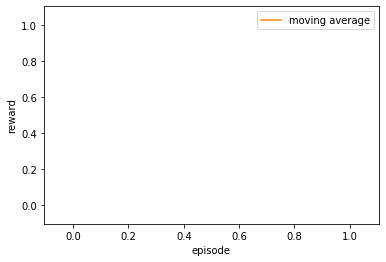

In [7]:
y = moving_average(agent.episode_rewards, n=100)

plt.plot(agent.episode_rewards)
plt.plot(range(99, len(agent.episode_rewards)), y, label="moving average")
plt.xlabel("episode")
plt.ylabel("reward")
plt.legend()
plt.show()

mean reward in 100 run: 231.28498082642147
std reward in 100 run: 49.53400556873645


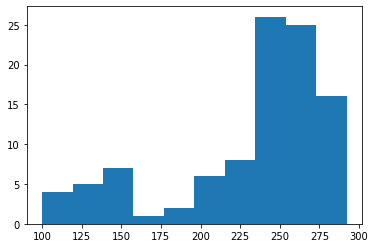

In [5]:
agent.load_model("weights/final_model2_ep900.h5")

mean, std, r = test_agent(agent, env)
print("mean reward in 100 run:", mean)
print("std reward in 100 run:", std)
plt.hist(r)
plt.show()

In [6]:
results={}
results['params'] = params
results['episode_rewards'] = agent.episode_rewards
results['test_rewards'] = rewards
results['moving_avg'] = list(y)
json.dump(results, open('experiments/final_model2.txt','w'))
agent.save_model("weights/final_model2.h5")

NameError: name 'rewards' is not defined